# Support Vector Machines

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import scipy

%matplotlib inline

In [129]:
X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

In [130]:
# Creazione delle etichette di classificazione basate sulla somma delle feature di ogni punto in X
# Se la somma delle due coordinate (x + y) è maggiore di 0.3, allora l'etichetta sarà "red" o +1
# Altrimenti, l'etichetta sarà "green" o -1

# Lista di etichette a colori ("red" per somma > 0.3, "green" altrimenti)
y = ["red" if x + y > 0.3 else "green" for [x, y] in X]

# Lista di etichette numeriche (+1 per somma > 0.3, -1 altrimenti)
y1 = [+1 if x + y > 0.3 else -1 for [x, y] in X]

print(y)
print(y1)

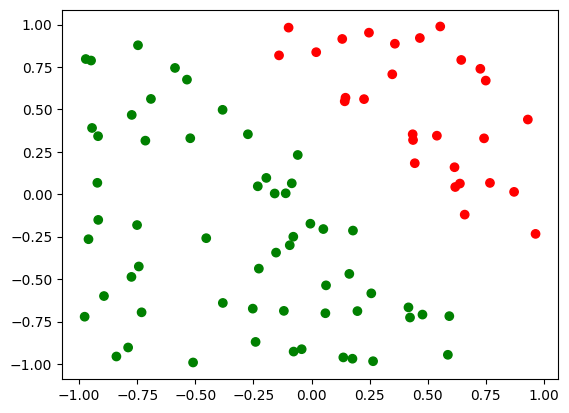

In [131]:
plt.scatter(X[:,0], X[:,1], c=y)

# SVM by *hand*

Let us use scipy.optimize.minimize to learn the SVM solution to the classification problem given above

Scipy has a quite powerful optimizer that we can use to quite easily implement the SVM primal optimization problem.

We start by noticing that the optimizer does not support non-homogeneous coordinates. We just add a column of 1s to the matrix $X$.

In [132]:
# Aggiunta di una colonna di bias alla matrice X
# np.ones(shape=[len(X), 1]) crea una colonna di 1 con lo stesso numero di righe di X
# np.column_stack combina X con questa nuova colonna, aggiungendo un termine costante per il bias
X = np.column_stack([X, np.ones(shape=[len(X), 1])])


Given this definition, the primal SVM optimization problem is:
$$
\begin{align}
\min_{\mathbf{w}} &\quad \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to} &\quad y_i (\mathbf{x}_i \cdot \mathbf{w}) \geq 1, \quad i = 1, \ldots, n
\end{align}
$$

and notice (it will become useful in a moment) that the constraints are:

$$
y_1 (\mathbf{x}_1 \cdot \mathbf{w}) \geq 1 \\
y_2 (\mathbf{x}_2 \cdot \mathbf{w}) \geq 1 \\
\vdots \\
y_n (\mathbf{x}_n \cdot \mathbf{w}) \geq 1
$$



Now, let's define the objective function of our minimization problem.

In [133]:
def objfun(w, *args):
    # Funzione obiettivo per l'ottimizzazione (ad esempio per un classificatore SVM lineare con soft margin)
    # La funzione restituisce 0.5 * ||w||^2, che è il termine di regolarizzazione L2 (ridge penalty).
    # Questo aiuta a mantenere i pesi w piccoli per evitare overfitting.
    return 0.5 * np.linalg.norm(w, 2) ** 2  


The most challenging part is to define the constraints for the problem. The scipy optimizer needs them in the form:

$\textit{lb} \leq \mathbf{A} \cdot \mathbf{w} \leq \textit{ub}$

where $w$ is the current set of linear parameters we are learning and are provided by the optimizer. We then have to devise a matrix $A$ and upper bounds *lb* and *ub* to model the ones we need for the SVM problem.

Note: *lb* and *ub* can be set to $+\infty$ (using `+np.inf`) or $-\infty$ (using `-np.inf`) if necessary.

Once we have defined $A$, *lb* and *ub*, the linear constraint can be created using:

`lc = scipy.optimize.LinearConstraint(A, lb, ub)`

In [134]:

# Converte y1 in un array NumPy con forma (n,1) (colonna invece di vettore riga)
# Questo è utile per garantire la corretta moltiplicazione tra matrici/vettori
y1 = np.array(y1).reshape(-1,1)

# Costruzione del problema di ottimizzazione
# Calcola la matrice A per la formulazione di un problema di ottimizzazione SVM.
# Ogni riga di A è ottenuta moltiplicando la corrispondente riga di X per il valore corrispondente di y1.
# Questo è tipico nella formulazione della SVM duale, dove A rappresenta i vincoli del problema di ottimizzazione.
A = y1 * X

# Definizione di un limite superiore (upper bound) infinito
# Indica che le variabili di ottimizzazione non hanno un vincolo massimo esplicito
ub = np.inf

# Definizione di un limite inferiore (lower bound) pari a 1 per ogni campione
# Questo potrebbe essere parte di una formulazione di ottimizzazione con vincoli su A
lb = np.ones(len(X))

In [135]:
# Definizione di un vincolo lineare per un problema di ottimizzazione (es. SVM duale)
# Il vincolo impone che A * x sia maggiore o uguale a lb e minore o uguale a ub:
# lb <= A * x <= ub

# A è la matrice dei vincoli, ottenuta moltiplicando le feature X per le etichette y1
# lb è il limite inferiore (tutti 1, indicando un vincolo di margine minimo)
# ub è il limite superiore (infinito, quindi non c'è un massimo imposto)
lc = scipy.optimize.LinearConstraint(A, lb, ub)


Finally, to invoke the optimizer we also need a starting point for the numerical search (0,0,0) would do just fine in this case.

In [136]:
x0 = np.array([0,0,0])
w =scipy.optimize.minimize(objfun, x0, constraints=[lc])
w.x

array([ 4.77255802,  4.0626345 , -1.65719461])

Let us now plot the results. In addition to plotting the data points, we also want to plot the decision function. The decision function is defined as: $w_1 x + w_2 y + w_3 = 0$. This means that the decision function is a line in the 2D space with equation $y = -\frac{w_1}{w_2} x - \frac{w_3}{w_2}$

In [137]:
xs = X
w = w.x
ys = -w[0] / w[1] * xs - w[2] / w[1]

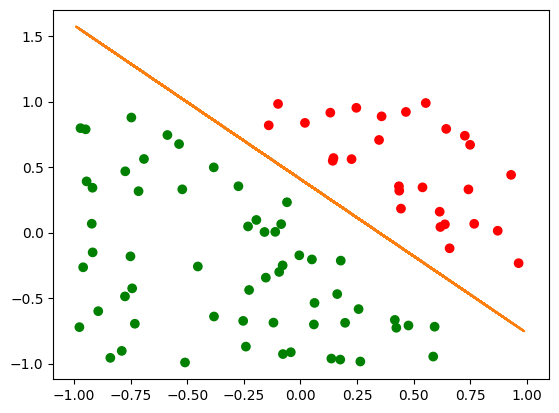

In [138]:
plt.plot(xs,ys)
plt.scatter(X[:,0], X[:,1], c=y)